# Forward chaining implimentation
Implement a forward chaining solver in Python for ascertaining the truth of a symbol given a knowledge base of definite clauses, following the algorithm in Fig 7.15 of Russell & Norvig. You could implement a class called Symbol to represent a logical symbol, as well as a class called DefiniteClause to represent the structure of a definite clause, with a premise set (the body of the clause) and a symbol for the conclusion (the head of the clause). A knowledge base can then be represented as a list of definite clauses.

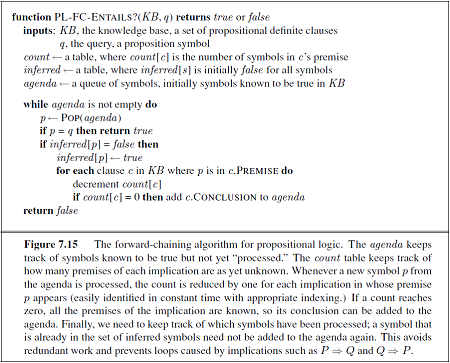

In [25]:
class DefiniteClause:   
    def __init__(self, head, body=set()):
        self.body = body
        self.head = head  

In [42]:
def ForwardChaining(KB, q):
    count = [len(clause.body) for clause in KB]
    inferred = {symbol: False for symbol in set([sym for clause in KB for sym in clause.body] 
                    + [clause.head for clause in KB])}
    
    agenda = [clause.head for clause in KB]
    
    while len(agenda) != 0:
        p = agenda.pop()
        if p == q: return True 
        if inferred[p] == False: 
            inferred[p] = True
            
            for i, clause in enumerate(KB):
                if p in clause.body: 
                    count[i] -= 1
                    if count[i] == 0: agenda.append(clause.head)                    
    return False

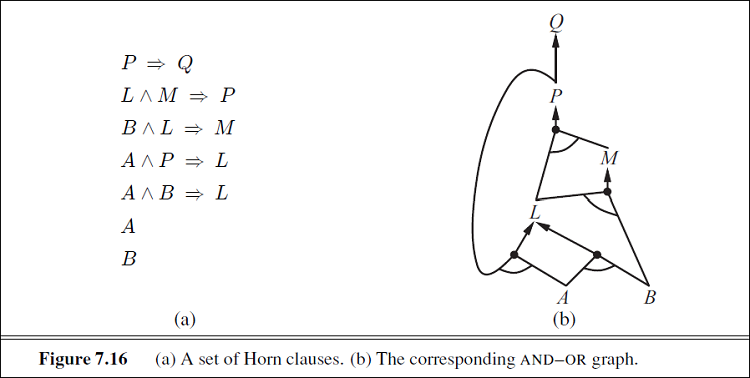

In [43]:
KB = [DefiniteClause("Q", ["P"]),
      DefiniteClause("P", ["L", "M"]),
      DefiniteClause("M", ["B", "L"]),
      DefiniteClause("L", ["A", "P"]),
      DefiniteClause("L", ["A", "B"]),
      DefiniteClause("A"),
      DefiniteClause("B")]

print(ForwardChaining(KB, "Q"))

True
